In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import ccxt
import functions as fn
from data import fees_schedule, order_book

Origin:
- Exchange : Kraken
- Fee schedule : Maker fee : 10 bps - Taker fee : 20 bps
- Inventory : 100 BTC - 1M EUR

Destination:
- Exchange : Bitpanda
- Fee schedule : Maker fee : 15 bps - Taker fee : 30 bps
- Inventory : 100 BTC - 1M EUR

Strategy Parameters : 
- Replicate first 100 bps
- FIFO system at the exchange
- Take into account fees
- Take into account execution latency
- Process Queue
- Read Order Book

In [2]:
exchanges = ["kraken", "bitfinex"]
symbol = 'BTC/EUR'
expected_volume = 0

In [3]:
fees = [fees_schedule(exchange=i, symbol=symbol, expected_volume=expected_volume) for i in exchanges]
ob_data = pd.read_json('files/orderbooks_ray.json', orient='values', typ='series')

In [4]:
EO_ts_data = [i for i in ob_data[exchanges[0]].keys() if ob_data[exchanges[0]][i] != None]
ED_ts_data = [i for i in ob_data[exchanges[1]].keys() if ob_data[exchanges[1]][i] != None]

q1_results = fn.f_timestamps_info(ts_list_o=EO_ts_data, ts_list_d=ED_ts_data)

display('Timestamps in Origin data:')
display('First Timestamp: ' + q1_results["first_o"])
display('Last Timestamp: ' + q1_results["last_o"])
display('Total number of orderbooks: ' + str(q1_results["qty_o"]))

display('Timestamps in Destination data:')
display('First Timestamp: ' + q1_results["first_d"])
display('Last Timestamp: ' + q1_results["last_d"])
display('Total number of orderbooks: ' + str(q1_results["qty_d"]))

display('Exact match of Timestamps: ' + str(q1_results["exact_match"]["qty"]))
if q1_results["exact_match"]["qty"] == 0:
    display("no exact matches")
else:
    display('First 2 values are: ')
    display(q1_results["exact_match"]["values"][0].strftime("%Y-%m-%dT%H:%M:%S.%fZ"))
    display(q1_results["exact_match"]["values"][1].strftime("%Y-%m-%dT%H:%M:%S.%fZ"))
    display('Last 2 values are: ')
    display(q1_results["exact_match"]["values"][-1].strftime("%Y-%m-%dT%H:%M:%S.%fZ"))
    display(q1_results["exact_match"]["values"][-2].strftime("%Y-%m-%dT%H:%M:%S.%fZ"))



'Timestamps in Origin data:'

'First Timestamp: 2021-11-24T15:15:52.328000Z'

'Last Timestamp: 2021-11-24T15:17:46.627000Z'

'Total number of orderbooks: 39'

'Timestamps in Destination data:'

'First Timestamp: 2021-11-24T15:15:49.471000Z'

'Last Timestamp: 2021-11-24T15:17:46.944000Z'

'Total number of orderbooks: 79'

'Exact match of Timestamps: 2'

'First 2 values are: '

'2021-11-24T15:16:28.424000Z'

'2021-11-24T15:16:31.432000Z'

'Last 2 values are: '

'2021-11-24T15:16:31.432000Z'

'2021-11-24T15:16:28.424000Z'

In [5]:
fees[1]

{'taker': 0.002, 'maker': 0.001}

In [6]:
ex_O = pd.DataFrame(ob_data[exchanges[0]]['2021-11-24T15:16:31.432Z'])
ex_D = pd.DataFrame(ob_data[exchanges[1]]['2021-11-24T15:16:31.432Z'])

In [7]:
display('Highest Bid Prices')
display('Destination: '+ exchanges[1]+ ' ' + str(max(ex_D.bid)))
display('Origin: ' + exchanges[0]+ ' ' + str(max(ex_O.bid)))

'Highest Bid Prices'

'Destination: bitfinex 56268.0'

'Origin: kraken 56276.0'

In [8]:
display('Lowest Ask Prices')
display('Destination: ' + exchanges[1]+ ' ' + str(min(ex_D.ask)))
display('Origin: ' + exchanges[0]+ ' ' +str(min(ex_O.ask)))

'Lowest Ask Prices'

'Destination: bitfinex 56273.0'

'Origin: kraken 56276.1'

Puedo vender en origin 56,276 y comprar en destination a 56,273 teniendo un profit de 3EUR

Puedo comprar en origin en 56,276.1 y vender en destination en 56,268 teniendo un profit de -8.1EUR

$ maker_{bid} = taker_{bid} * (1 - taker_{fee}) / (1 + maker_{fee}) $

$ taker_{bid} * (1 + taker_{fee}) = maker_{ask} * (1 - maker_{fee})$

In [9]:
fees[0]

{'taker': 0.0026, 'maker': 0.0016}

In [10]:
fees[1]

{'taker': 0.002, 'maker': 0.001}

In [11]:
origin_bid = 56276.0
taker_fee = 0.0026
maker_fee = 0.001

In [12]:
maker_bid = origin_bid*(1-taker_fee)/(1+maker_fee)
maker_bid

56073.6087912088

In [13]:
pd.set_option('display.max_rows', None)  
ex_D

,ask_size,ask,bid,bid_size,spread
0,0.035600,56273.0,56268.0,0.000070,5.0
1,0.187329,56275.0,56267.0,0.420000,8.0
2,0.182073,56281.0,56264.0,0.001985,17.0
3,0.074227,56282.0,56263.0,0.002481,19.0
4,0.059343,56286.0,56262.0,0.009923,24.0
5,0.190300,56287.0,56261.0,0.168181,26.0
6,0.010000,56289.0,56259.0,0.049619,30.0
7,0.948159,56290.0,56257.0,0.595527,33.0
8,0.100000,56291.0,56256.0,0.009100,35.0
9,0.009792,56292.0,56255.0,0.000330,37.0


In [14]:
spread = 25
Mid_price_origin = round((min(ex_O.ask)+max(ex_O.bid))/2,6)
PLimit_Repl_max = Mid_price_origin * (1+spread/10000)
PLimit_Repl_min = Mid_price_origin * (1-spread/10000)

In [15]:
ex_D_ask = ex_D.loc[:,'ask_size':'ask'].copy()
ex_D_ask.columns = ['size', 'price']
ex_D_ask['Type'] = 'ask'
ex_D_bid = ex_D[['bid_size','bid']].copy()
ex_D_bid.columns = ['size', 'price']
ex_D_bid['Type'] = 'bid'
ex_D_final = pd.concat([ex_D_ask,ex_D_bid]).sort_values('price')
ex_D_final.reset_index(inplace=True, drop=True)

ex_O_ask = ex_O[ex_O.ask<=PLimit_Repl_max].loc[:,'ask_size':'ask'].copy() #limitamos por los bps a replicar
ex_O_ask.columns = ['size', 'price']
ex_O_ask = ex_O_ask[~ex_O_ask.price.isin([ex_D_ask.price])] #no copiaremos los precios donde ya hay volumen
ex_O_ask['Type'] = 'ask'
ex_O_bid = ex_O[ex_O.bid>=PLimit_Repl_min][['bid_size','bid']].copy()#limitamos por los bps a replicar
ex_O_bid.columns = ['size', 'price']
ex_O_bid = ex_O_bid[~ex_O_bid.price.isin([ex_D_bid.price])] #no copiaremos los precios donde ya hay volumen
ex_O_bid['Type'] = 'bid'
ex_O_final = pd.concat([ex_O_ask,ex_O_bid]).sort_values('price')
ex_O_final.reset_index(inplace=True, drop=True)

In [16]:
fiat = 1000000 #1M EUR
inven = 100 #100BTC

In [17]:
display(ex_D_final)

,size,price,Type
0,0.666600,56229.0,bid
1,0.020000,56231.0,bid
2,0.072867,56233.0,bid
3,0.200220,56234.0,bid
4,0.221700,56235.0,bid
5,0.069273,56236.0,bid
6,1.158200,56238.0,bid
7,0.964500,56239.0,bid
8,0.035600,56241.0,bid
9,0.365400,56243.0,bid


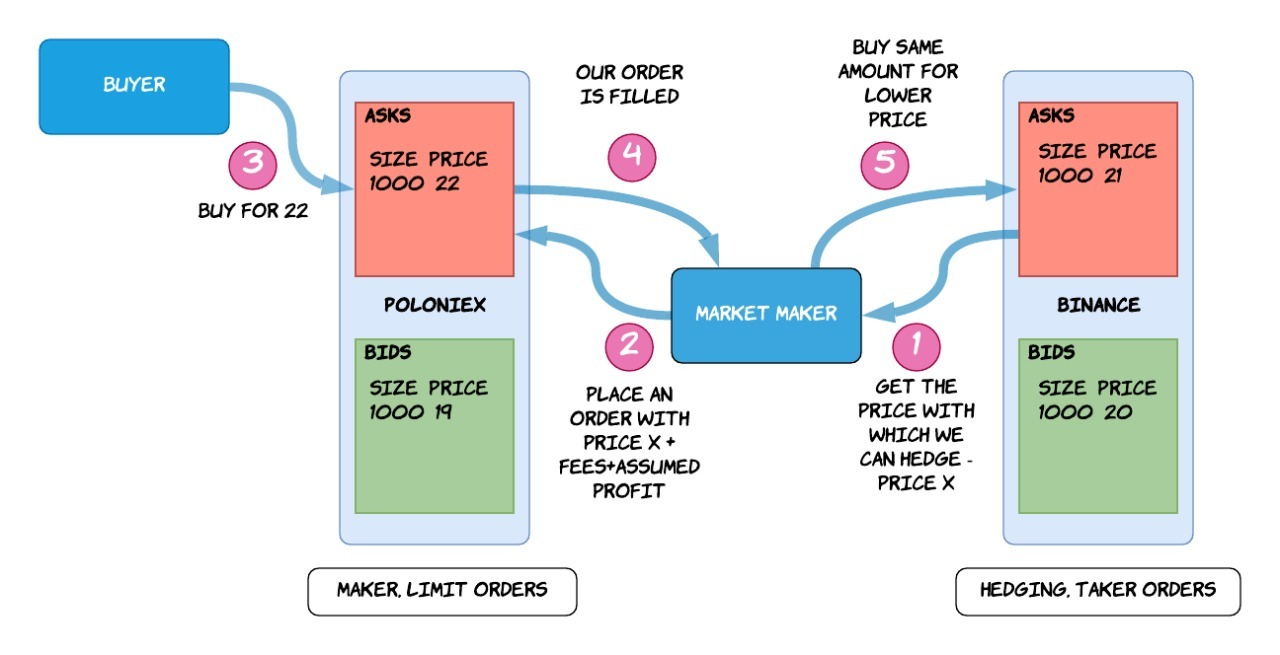

In [18]:
def calc_D_bid(origin_bid, taker_fee, maker_fee, decimals, profit):
    b = origin_bid*(1-taker_fee)/(1+maker_fee) - profit
    return round(b,decimals)

def calc_D_ask(origin_ask, taker_fee, maker_fee, decimals, profit):
    a = origin_ask*(1+taker_fee)/(1-maker_fee) + profit
    return round(a,decimals)

In [19]:
def post_maker_bid(origin_bid, volume, taker_fee, maker_fee, inventory, tokens, ex_D_final, decimals, profit):
    
    destination_bid = calc_D_bid(origin_bid, taker_fee, maker_fee, decimals, profit) #obtenemos el precio de equilibrio
    
    inventory.update({'asset': (inventory['asset'] - volume).values[0]}) #reservamos el volumen a entregar en caso de ejecucion
    tokens.update({'asset': (tokens['asset'] + volume).values[0]})       #reservamos el volumen a entregar en caso de ejecucion
    
    ex_D_final.loc[-1] = [volume.values[0],destination_bid.values[0],"bid"] #posteamos la orden
    print('Order posted')
    print(ex_D_final.loc[-1])
    ex_D_final = ex_D_final.sort_values('price') #ordenamos el libro
    ex_D_final.reset_index(inplace=True, drop=True) #reseteamos el índice
    return ex_D_final, inventory, tokens

def post_maker_ask(origin_ask, volume, taker_fee, maker_fee,inventory, tokens,ex_D_final, decimals, profit):
    
    destination_ask = calc_D_ask(origin_ask, taker_fee, maker_fee, decimals, profit) #obtenemos el precio de equilibrio
    
    inventory.update({'fiat': (inventory['fiat'] - destination_ask * volume).values[0]}) #reservamos el volumen a entregar en caso de ejecucion
    tokens.update({'fiat': (tokens['fiat'] + destination_ask * volume).values[0]})       #reservamos el volumen a entregar en caso de ejecucion
    
    ex_D_final.loc[-1] = [volume.values[0],destination_ask.values[0],"ask"] #posteamos la orden
    print('Order posted')
    print(ex_D_final.loc[-1])
    ex_D_final = ex_D_final.sort_values('price') #ordenamos el libro
    ex_D_final.reset_index(inplace=True, drop=True)  #reseteamos el índice
    return ex_D_final, inventory, tokens


Seleccionamos los mejores bid y ask para postear en nuestro libro, estos seran las anclas para alcanzar la liquidez

In [20]:
bid_example = ex_O_final[ex_O_final['Type'] =='bid']
bid_example = bid_example[bid_example['price'] == bid_example['price'].max()]

ask_example = ex_O_final[ex_O_final['Type'] =='ask']
ask_example = ask_example[ask_example['price'] == ask_example['price'].min()]

display(bid_example)
display(ask_example)

,size,price,Type
88,5.42,56276.0,bid


,size,price,Type
89,3.279,56276.1,ask


Definimos los fees y nuestro inventario

In [21]:
taker_fee = fees[0]['taker']*0.0001 #bps to decimal
maker_fee = fees[1]['maker']*0.0001 #bps to decimal
token = 100 #BTC
fiat = 1000000 #EUR
inventory = {'asset':100, 'fiat':1000000}
tokens = {'asset':0, 'fiat':0}
profit = 0.01 #1 centavo de profit por trade
decimals = 10

Convertimos los precios de origen y los posteamos considerando los fees (y utilidad proximamente)

In [22]:
ex_D_final, inventory, tokens = post_maker_bid(bid_example['price'], bid_example['size'], taker_fee, maker_fee,
                                               inventory, tokens,ex_D_final, decimals, profit)

ex_D_final, inventory, tokens = post_maker_ask(ask_example['price'], ask_example['size'], taker_fee, maker_fee,
                                               inventory, tokens,ex_D_final, decimals, profit)
ex_D_final

Order posted
size      5.42
price    56276
Type       bid
Name: -1, dtype: object
Order posted
size       3.279
price    56276.1
Type         ask
Name: -1, dtype: object


,size,price,Type
0,0.666600,56229.000000,bid
1,0.020000,56231.000000,bid
2,0.072867,56233.000000,bid
3,0.200220,56234.000000,bid
4,0.221700,56235.000000,bid
5,0.069273,56236.000000,bid
6,1.158200,56238.000000,bid
7,0.964500,56239.000000,bid
8,0.035600,56241.000000,bid
9,0.365400,56243.000000,bid


Observamos que se han posteado dos nuevas limit orders (indice 27 y 28) y nuestro inventario se ha reducido, pasando a la reserva en caso de ejecución (tokens).

In [23]:
inventory, tokens

({'asset': 94.58, 'fiat': 815470.5688794339},
 {'asset': 5.42, 'fiat': 184529.43112056603})

In [24]:
def execute_bids(origin_bid, destination_bid, taker_fee, maker_fee, volume, inventory, tokens, ex_D_final,ex_O_final):
    
    #ejecutamos el origin bid
    idx = ex_O_final[(ex_O_final['Type'] =='bid') & (ex_O_final['price'] == origin_bid)].index[0] #obtenemos la orden orig
    ex_O_final.loc[idx,'size'] = ex_O_final.loc[idx,'size'] - volume #actualizamos el size
    
    tokens.update({'fiat': tokens['fiat'] + volume * origin_bid * (1 - taker_fee)})#Recibimos el bid menos la comision
    tokens.update({'asset': tokens['asset'] - volume}) #entregamos el activo
    
    #nos ejecutan el destination bid
    idx = ex_D_final[(ex_O_final['Type'] =='bid') & (ex_D_final['price'] == destination_bid)].index[0] #obtenemos la orden dest
    ex_D_final.loc[idx,'size'] = ex_D_final.loc[idx,'size'] - volume #actualizamos el size
    
    inventory.update({'asset': inventory['asset'] + volume}) #obtenemos el activo
    tokens.update({'fiat': tokens['fiat'] - volume * destination_bid * (1 + maker_fee)})#pagamos el bid más la comisión
    
    return inventory, tokens, ex_D_final, ex_O_final

def execute_asks(origin_ask, destination_ask, taker_fee, maker_fee, volume, inventory, tokens, ex_D_final,ex_O_final):
    
    #ejecutamos el origin ask
    idx = ex_O_final[(ex_O_final['Type'] =='ask') & (ex_O_final['price'] == origin_ask)].index[0] #obtenemos la orden orig
    ex_O_final.loc[idx,'size'] = ex_O_final.loc[idx,'size'] - volume #actualizamos el size
    
    tokens.update({'asset': tokens['asset'] + volume}) #obtenemos el activo
    tokens.update({'fiat': tokens['fiat'] - volume * origin_ask * (1 + taker_fee)})#pagamos el ask más la comisión
    
    #nos ejecutan el destination bid
    idx = ex_D_final[(ex_D_final['Type'] =='ask') & (ex_D_final['price'] == destination_ask)].index[0] #obtenemos la orden dest
    ex_D_final.loc[idx,'size'] = ex_D_final.loc[idx,'size'] - volume #actualizamos el size
    
    inventory.update({'fiat': inventory['fiat'] + volume * destination_ask * (1 - maker_fee)})#Recibimos el ask menos la comision
    tokens.update({'asset': tokens['asset'] - volume}) #entregamos el activo
    
    return inventory, tokens, ex_D_final, ex_O_final

Ejecutamos como ejemplo un bid, transfiriendo la liquidez del origin al destination sin riesgo

In [25]:
ex_D_final_2 = ex_D_final.copy()
ex_O_final_2 = ex_O_final.copy()
destination_bid = calc_D_bid(56276, taker_fee, maker_fee, decimals, profit) #calculamos los precios posteados
destination_ask = calc_D_ask(56276.1, taker_fee, maker_fee, decimals, profit) #calculamos los precios posteados

In [26]:
inventory, tokens, ex_D_final_2, ex_O_final_2 = execute_bids(56276.0, destination_bid, taker_fee, maker_fee, 
                                                             5.42, inventory, tokens,ex_D_final_2,ex_O_final_2)
#ejecutamos los bids

/var/folders/md/ptw3ml_d3zg9s7cjrr21sm1h0000gn/T/ipykernel_13118/3856073320.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = ex_D_final[(ex_O_final['Type'] =='bid') & (ex_D_final['price'] == destination_bid)].index[0] #obtenemos la orden dest


Como se observa, nuestro inventario en activos (BTC) ha regresado a su valor original, despues de ejecutar en los dos mercados, asi como una ganancia de 1 centavo - ajustes por redondeo en el post order.

In [27]:
inventory, tokens

({'asset': 100.0, 'fiat': 815470.5688794339},
 {'asset': 0.0, 'fiat': 184529.48532057158})

In [28]:
inventory, tokens, ex_D_final_2, ex_O_final_2 = execute_asks(56276.1, destination_ask, taker_fee, maker_fee, 
                                                             3.279, inventory, tokens,ex_D_final_2,ex_O_final_2)
#ejecutamos los asks

Nuestro fiat del inventorio representa nuestra perdida por redondeo, mientras que el del token representa nuestra ganancia de los trades

In [29]:
inventory, tokens

({'asset': 100.0, 'fiat': 999999.9815470568},
 {'asset': 0.0, 'fiat': 0.10544294529245235})

In [30]:
inventory['fiat']+tokens['fiat']

1000000.0869900021

Tambien observamos que el volumen de estos precios se ah reducido debido a la ejucicón de ordenes.

In [31]:
display(ex_O_final[ex_O_final['price'] == 56276.0])
display(ex_O_final_2[ex_O_final_2['price'] == 56276.0])

,size,price,Type
88,5.42,56276.0,bid


,size,price,Type
88,0.0,56276.0,bid


In [32]:
display(ex_D_final[ex_D_final['price'] == destination_bid])
display(ex_D_final_2[ex_D_final_2['price'] == destination_bid])

,size,price,Type
27,5.42,56275.969741,bid


,size,price,Type
27,0.0,56275.969741,bid
